<a href="https://colab.research.google.com/github/rmatrella/BirdsSound/blob/main/Pretrained_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd "/content/drive/MyDrive/Marino_Matrella"
root = os.getcwd()

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project


# Init

In [ ]:
from google.colab import drive
import os
import shutil
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from keras.models import Model
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [ ]:
MODEL_FOLDER = os.path.join(root, 'birds/model/ResNet50/')
MODEL_FOLDER

'/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/'

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
PATH = os.path.join(root,'birds/dataset')

train_set = image_dataset_from_directory(
    os.path.join(PATH, 'train_audio_aug'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

test_set = image_dataset_from_directory(
    os.path.join(PATH, 'test'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=False,
    color_mode='rgb')

validation_set = image_dataset_from_directory(
    os.path.join(PATH, 'validation'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

Found 10000 files belonging to 100 classes.
Found 5306 files belonging to 100 classes.
Found 7983 files belonging to 100 classes.


In [ ]:
%run '/content/drive/MyDrive/Marino_Matrella/Utilities.ipynb'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project
tensor version is  2.14.0-dev20230629


# Load model

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
conv_base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)
)
conv_base.trainable = False
# print(conv_base.summary())

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# keras.utils.plot_model(conv_base, "conv_base.png")

In [ ]:
IMG_SIZE = 224
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

# Feature extraction

##Model 1 - Flatten + Dense

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)

outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

name = 'ResNet50_fl_dense'
model = compile_model(model)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               256903

In [ ]:
history = run_model(model, name, train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 5.8929 - accuracy: 0.2699 - f1_score: 0.2689
Epoch 1: val_loss improved from inf to 4.88672, saving model to /content/drive/MyDrive/CIDL project/birds/model/ResNet50/ResNet_50_fl_dense.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1894s 6s/step - loss: 5.8929 - accuracy: 0.2699 - f1_score: 0.2689 - val_loss: 4.8867 - val_accuracy: 0.3901 - val_f1_score: 0.4087 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1487 - accuracy: 0.7609 - f1_score: 0.7607
Epoch 2: val_loss improved from 4.88672 to 4.07740, saving model to /content/drive/MyDrive/CIDL project/birds/model/ResNet50/ResNet_50_fl_dense.h5
313/313 [==============================] - 103s 328ms/step - loss: 1.1487 - accuracy: 0.7609 - f1_score: 0.7607 - val_loss: 4.0774 - val_accuracy: 0.4329 - val_f1_score: 0.4636 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8944 - f1_score: 0.8944
Epoch 3: val_loss did not improve from 4.07740
313/313 [==============================] - 99s 313ms/step - loss: 0.3875 - accuracy: 0.8944 - f1_score: 0.8944 - val_loss: 4.1610 - val_accuracy: 0.4495 - val_f1_score: 0.4792 - lr: 1.0000e-

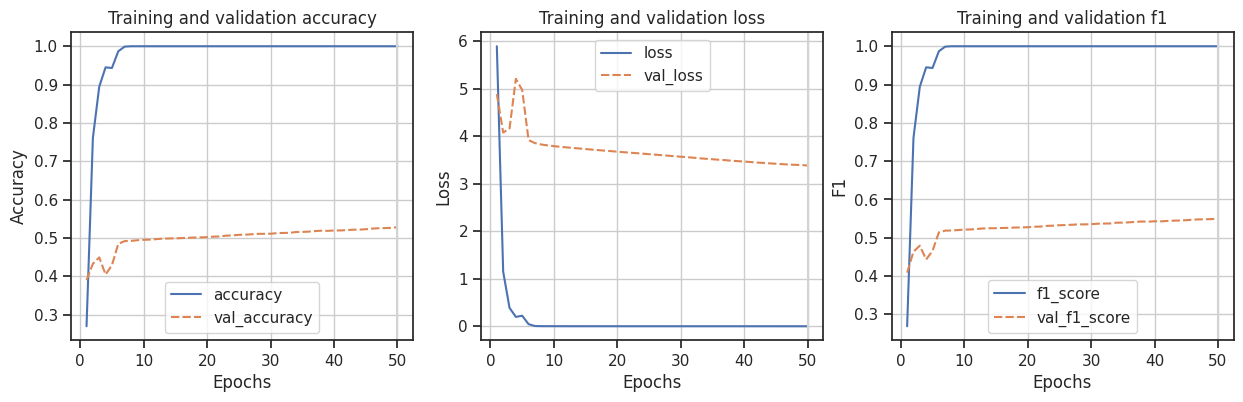

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 30s 167ms/step - loss: 3.6118 - accuracy: 0.5136 - f1_score: 0.5377

Test loss: 3.612
Test accuracy: 0.514
Test f1: 0.538

Accuracy on test data: 51.36 %
F1-Score on test data: 53.77 %

              precision    recall  f1-score   support

     abhori1       0.48      0.42      0.45        50
     afecuc1       0.64      0.75      0.69        28
     afghor1       0.38      0.70      0.49        20
     afmdov1       0.26      0.60      0.36        15
     afpfly1       0.12      0.13      0.13        31
     afpwag1       0.24      0.62      0.35        24
     afrgos1       0.33      0.75      0.46        24
     afrthr1       0.51      0.63      0.57        30
     amesun2       0.03      0.08      0.04        13
      barswa       0.59      0.40      0.48       166
     bawhor2       0.33      0.87      0.48        15
     bcbeat1       0.23      0.71      0.34        17
     beasun2       0.29      0.67      0.40        12
     bkctch1  

##Model 1c - GlobalAvgPooling + 1 Dense (512, relu)

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model = compile_model(model)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.1980 - accuracy: 0.1015 - f1_score: 0.0924
Epoch 1: val_loss improved from inf to 3.65977, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense512_relu.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1340s 4s/step - loss: 4.1980 - accuracy: 0.1015 - f1_score: 0.0924 - val_loss: 3.6598 - val_accuracy: 0.2122 - val_f1_score: 0.2304 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.3693 - accuracy: 0.2627 - f1_score: 0.2463
Epoch 2: val_loss improved from 3.65977 to 3.12042, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense512_relu.h5
313/313 [==============================] - 98s 309ms/step - loss: 3.3693 - accuracy: 0.2627 - f1_score: 0.2463 - val_loss: 3.1204 - val_accuracy: 0.3248 - val_f1_score: 0.3430 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 2.9381 - accuracy: 0.3415 - f1_score: 0.3286
Epoch 3: val_loss improved from 3.12042 to 2.85511, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNe

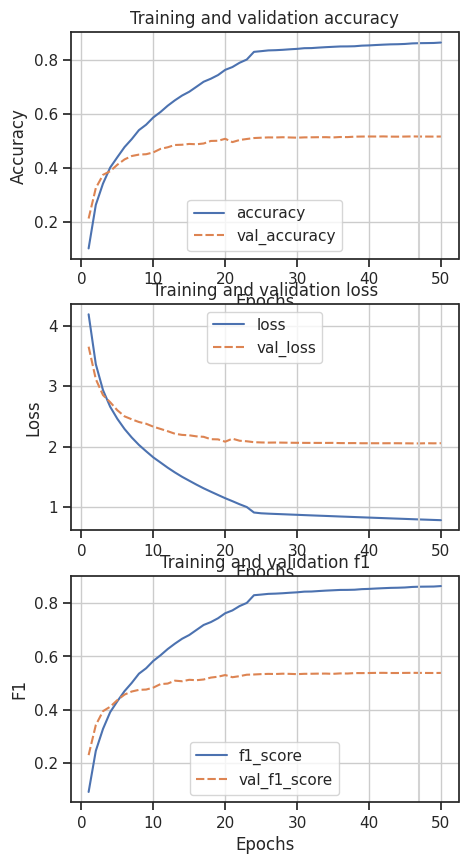

In [ ]:
history = run_model(model, 'ResNet50_gap_dense512_relu', train_set, validation_set, MODEL_FOLDER)


In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_gap_dense512_relu'))

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/ResNet50_gap_dense512_relu.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 31s 175ms/step - loss: 2.1262 - accuracy: 0.5030 - f1_score: 0.5313

Test loss: 2.126
Test accuracy: 0.503
Test f1: 0.531

Accuracy on test data: 50.30 %
F1-Score on test data: 53.13 %

              precision    recall  f1-score   support

     abhori1       0.37      0.38      0.37        50
     afecuc1       0.82      0.82      0.82        28
     afghor1       0.41      0.55      0.47        20
     afmdov1       0.30      0.53      0.38        15
     afpfly1       0.14      0.13      0.14        31
     afpwag1       0.50      0.54      0.52        24
     afrgos1       0.42      0.67      0.52        24
     afrthr1       0.59      0.67      0.62        30
     amesun2       0.03      0.08      0.04        13
      barswa       0.56      0.36      0.44       166
     bawhor2       0.27      0.60      0.37        15
     bcbeat1       0.19      0.71      0.30        17
     beasun2       0.20      0.50      0.29        12
     bkctch1  

## Model 2 - GlobalAvgPooling + 1 Dense (512) + Dropout

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

print(model2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                           

In [ ]:
model2 = compile_model(model2)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5574 - accuracy: 0.0407 - f1_score: 0.0375
Epoch 1: val_loss improved from inf to 4.13125, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 101s 303ms/step - loss: 4.5574 - accuracy: 0.0407 - f1_score: 0.0375 - val_loss: 4.1313 - val_accuracy: 0.1314 - val_f1_score: 0.1335 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.0138 - accuracy: 0.1186 - f1_score: 0.1075
Epoch 2: val_loss improved from 4.13125 to 3.65853, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2.h5
313/313 [==============================] - 96s 303ms/step - loss: 4.0138 - accuracy: 0.1186 - f1_score: 0.1075 - val_loss: 3.6585 - val_accuracy: 0.2413 - val_f1_score: 0.2426 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.6334 - accuracy: 0.1845 - f1_score: 0.1707
Epoch 3: val_loss improved from 3.65853 to 3.35714, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2.h5
313

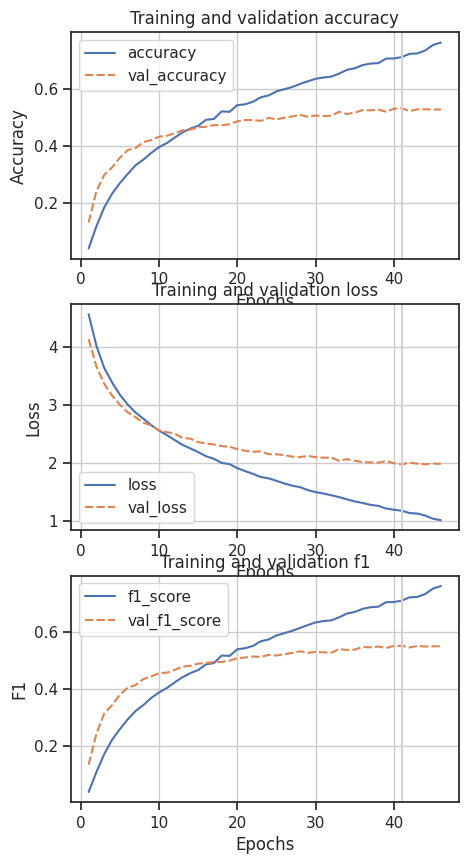

In [ ]:
history2 = run_model(model2, 'ResNet50_2', train_set, validation_set, MODEL_FOLDER)


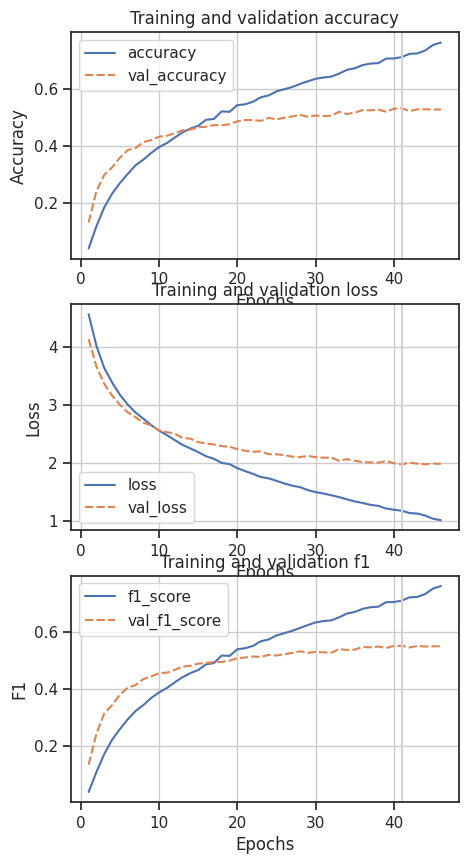

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_2'))

In [ ]:
loaded_model2 = load_model(MODEL_FOLDER + "/ResNet50_2.h5")
evaluate_model(loaded_model2)

## Model 2_1 - GlobalAvgPooling + 1 Dense (512) + Dense(256) + Dropout

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model2 = compile_model(model2)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5297 - accuracy: 0.0321 - f1_score: 0.0289
Epoch 1: val_loss improved from inf to 4.24374, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1708s 5s/step - loss: 4.5297 - accuracy: 0.0321 - f1_score: 0.0289 - val_loss: 4.2437 - val_accuracy: 0.0917 - val_f1_score: 0.0966 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.1323 - accuracy: 0.0962 - f1_score: 0.0864
Epoch 2: val_loss improved from 4.24374 to 3.82340, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2_1.h5
313/313 [==============================] - 145s 461ms/step - loss: 4.1323 - accuracy: 0.0962 - f1_score: 0.0864 - val_loss: 3.8234 - val_accuracy: 0.1781 - val_f1_score: 0.1853 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.7867 - accuracy: 0.1529 - f1_score: 0.1409
Epoch 3: val_loss improved from 3.82340 to 3.47698, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet101_2_1.h5


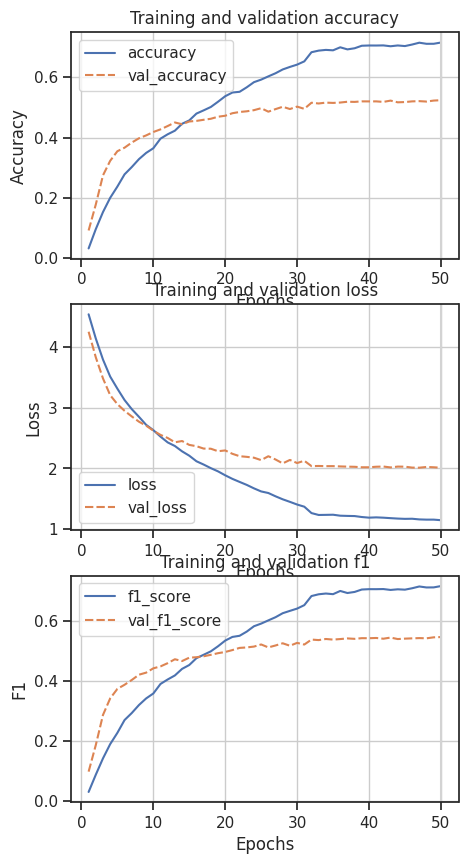

In [ ]:
history2 = run_model(model2, 'ResNet50_2_1', train_set, validation_set, MODEL_FOLDER)


In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_2_1'))

In [ ]:
loaded_model2 = load_model(MODEL_FOLDER + "/ResNet50_2_1.h5")
evaluate_model(loaded_model2)

166/166 [==============================] - 33s 190ms/step - loss: 2.0691 - accuracy: 0.5089 - f1_score: 0.5336

Test loss: 2.069
Test accuracy: 0.509
Test f1: 0.534

Accuracy on test data: 50.89 %
F1-Score on test data: 53.36 %

              precision    recall  f1-score   support

     abhori1       0.45      0.42      0.43        50
     afecuc1       0.77      0.86      0.81        28
     afghor1       0.41      0.60      0.49        20
     afmdov1       0.24      0.53      0.33        15
     afpfly1       0.12      0.13      0.13        31
     afpwag1       0.37      0.58      0.45        24
     afrgos1       0.37      0.71      0.49        24
     afrthr1       0.53      0.67      0.59        30
     amesun2       0.07      0.23      0.10        13
      barswa       0.55      0.33      0.41       166
     bawhor2       0.21      0.47      0.29        15
     bcbeat1       0.17      0.71      0.28        17
     beasun2       0.20      0.67      0.31        12
     bkctch1  

## Model 2_2 - GlobalAvgPooling + BatchNorm + 1 Dense (512) + Dense(256) + Dropout

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet.preprocess_input(inputs)
x = conv_base(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model2 = compile_model(model2)

In [ ]:
history2 = run_model(model2, 'ResNet50_2_2', train_set, validation_set, MODEL_FOLDER)


Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5428 - accuracy: 0.0413 - f1_score: 0.0411
Epoch 1: val_loss improved from inf to 4.12274, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_2_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2552s 8s/step - loss: 4.5428 - accuracy: 0.0413 - f1_score: 0.0411 - val_loss: 4.1227 - val_accuracy: 0.1498 - val_f1_score: 0.1583 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.8717 - accuracy: 0.1452 - f1_score: 0.1353
Epoch 2: val_loss improved from 4.12274 to 3.52640, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_2_2.h5
313/313 [==============================] - 101s 318ms/step - loss: 3.8717 - accuracy: 0.1452 - f1_score: 0.1353 - val_loss: 3.5264 - val_accuracy: 0.2638 - val_f1_score: 0.2766 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.4155 - accuracy: 0.2274 - f1_score: 0.2174
Epoch 3: val_loss improved from 3.52640 to 3.16134, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_2_2.h5
31

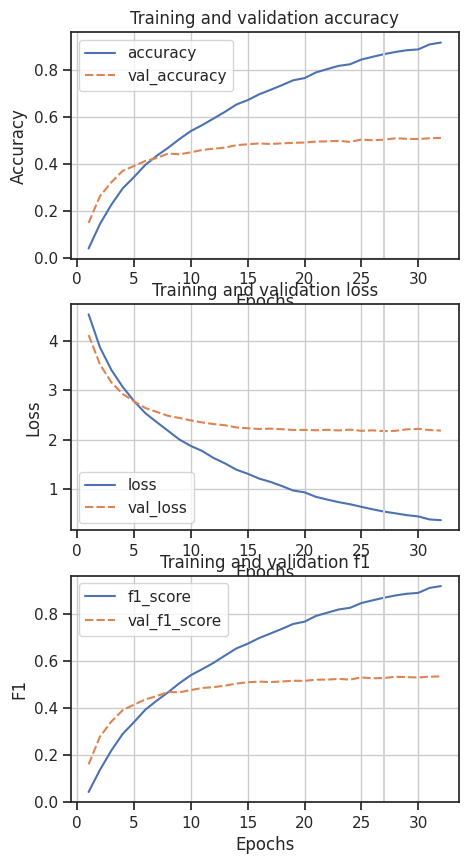

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_2_2'))

In [ ]:
loaded_model2 = load_model(MODEL_FOLDER + "/ResNet50_2_2.h5")
evaluate_model(loaded_model2)

166/166 [==============================] - 32s 182ms/step - loss: 2.2592 - accuracy: 0.4953 - f1_score: 0.5228

Test loss: 2.259
Test accuracy: 0.495
Test f1: 0.523

Accuracy on test data: 49.53 %
F1-Score on test data: 52.28 %

              precision    recall  f1-score   support

     abhori1       0.38      0.48      0.42        50
     afecuc1       0.76      0.79      0.77        28
     afghor1       0.52      0.55      0.54        20
     afmdov1       0.33      0.53      0.41        15
     afpfly1       0.12      0.16      0.14        31
     afpwag1       0.29      0.50      0.36        24
     afrgos1       0.40      0.71      0.52        24
     afrthr1       0.50      0.70      0.58        30
     amesun2       0.13      0.31      0.19        13
      barswa       0.53      0.34      0.41       166
     bawhor2       0.21      0.53      0.30        15
     bcbeat1       0.20      0.53      0.30        17
     beasun2       0.31      0.67      0.42        12
     bkctch1  

##Model 3 - GlobalAvgPooling + Dense (256, relu)

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

name = 'ResNet50_gap_dense_relu'
model = compile_model(model)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
history = run_model(model, name, train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.3717 - accuracy: 0.0690 - f1_score: 0.0599
Epoch 1: val_loss improved from inf to 3.97964, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense_relu.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1853s 6s/step - loss: 4.3717 - accuracy: 0.0690 - f1_score: 0.0599 - val_loss: 3.9796 - val_accuracy: 0.1590 - val_f1_score: 0.1656 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.6677 - accuracy: 0.2011 - f1_score: 0.1832
Epoch 2: val_loss improved from 3.97964 to 3.44330, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense_relu.h5
313/313 [==============================] - 56s 177ms/step - loss: 3.6677 - accuracy: 0.2011 - f1_score: 0.1832 - val_loss: 3.4433 - val_accuracy: 0.2611 - val_f1_score: 0.2757 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.2179 - accuracy: 0.2897 - f1_score: 0.2749
Epoch 3: val_loss improved from 3.44330 to 3.13449, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50

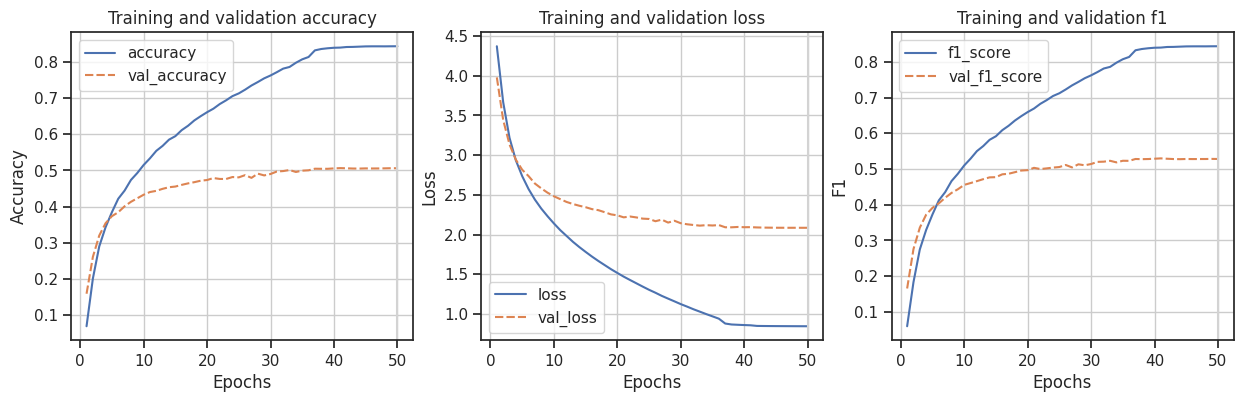

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 18s 96ms/step - loss: 2.1523 - accuracy: 0.4968 - f1_score: 0.5237

Test loss: 2.152
Test accuracy: 0.497
Test f1: 0.524

Accuracy on test data: 49.68 %
F1-Score on test data: 52.37 %

              precision    recall  f1-score   support

     abhori1       0.33      0.40      0.36        50
     afecuc1       0.92      0.79      0.85        28
     afghor1       0.44      0.60      0.51        20
     afmdov1       0.23      0.60      0.33        15
     afpfly1       0.13      0.16      0.14        31
     afpwag1       0.40      0.50      0.44        24
     afrgos1       0.45      0.75      0.56        24
     afrthr1       0.61      0.67      0.63        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.54      0.33      0.41       166
     bawhor2       0.17      0.53      0.26        15
     bcbeat1       0.18      0.71      0.29        17
     beasun2       0.18      0.67      0.29        12
     bkctch1   

##Model 3.5 - GlobalAvgPooling + Dense (256, relu) + Dropout

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

name = 'ResNet50_gap_dense_relu_drop'
model = compile_model(model)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
history = run_model(model, name, train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5925 - accuracy: 0.0280 - f1_score: 0.0237
Epoch 1: val_loss improved from inf to 4.35857, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2985s 9s/step - loss: 4.5925 - accuracy: 0.0280 - f1_score: 0.0237 - val_loss: 4.3586 - val_accuracy: 0.0808 - val_f1_score: 0.0842 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.2639 - accuracy: 0.0698 - f1_score: 0.0602
Epoch 2: val_loss improved from 4.35857 to 3.99805, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_gap_dense_relu_drop.h5
313/313 [==============================] - 61s 194ms/step - loss: 4.2639 - accuracy: 0.0698 - f1_score: 0.0602 - val_loss: 3.9981 - val_accuracy: 0.1786 - val_f1_score: 0.1842 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.9925 - accuracy: 0.1158 - f1_score: 0.1030
Epoch 3: val_loss improved from 3.99805 to 3.69629, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/Res

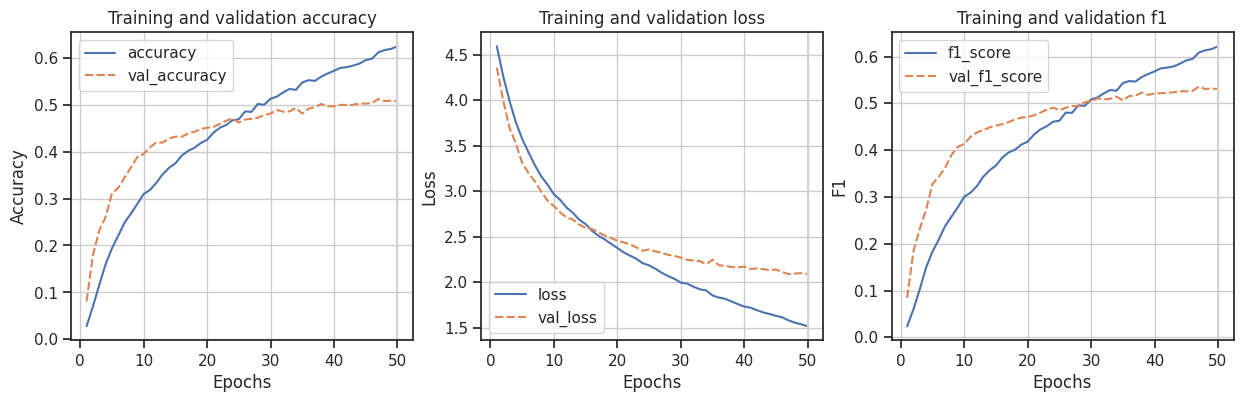

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 19s 103ms/step - loss: 2.1496 - accuracy: 0.4968 - f1_score: 0.5245

Test loss: 2.150
Test accuracy: 0.497
Test f1: 0.524

Accuracy on test data: 49.68 %
F1-Score on test data: 52.45 %

              precision    recall  f1-score   support

     abhori1       0.46      0.44      0.45        50
     afecuc1       0.92      0.82      0.87        28
     afghor1       0.32      0.60      0.41        20
     afmdov1       0.41      0.60      0.49        15
     afpfly1       0.12      0.16      0.14        31
     afpwag1       0.29      0.42      0.34        24
     afrgos1       0.52      0.58      0.55        24
     afrthr1       0.63      0.63      0.63        30
     amesun2       0.02      0.08      0.04        13
      barswa       0.50      0.33      0.40       166
     bawhor2       0.22      0.47      0.30        15
     bcbeat1       0.14      0.76      0.23        17
     beasun2       0.24      0.58      0.34        12
     bkctch1  

# Fine tuning

## Last block - model 2_1

In [ ]:
model_finetuning_1 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_2_1.h5'))

model_finetuning_1.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_1.get_layer('resnet50').layers:
  if layer.name == 'conv5_block2_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_1.summary())
for i, layer in enumerate(model_finetuning_1.get_layer('resnet50').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model_finetuning_1 = compile_model(model_finetuning_1, optimizer="adam")

In [ ]:
history_finetuning1 = run_model(model_finetuning_1, 'ResNet50_finetuning1', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 3.3768 - accuracy: 0.2308 - f1_score: 0.2176
Epoch 1: val_loss improved from inf to 2.67957, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1974s 6s/step - loss: 3.3768 - accuracy: 0.2308 - f1_score: 0.2176 - val_loss: 2.6796 - val_accuracy: 0.3859 - val_f1_score: 0.3959 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 2.7462 - accuracy: 0.3549 - f1_score: 0.3444
Epoch 2: val_loss improved from 2.67957 to 2.41311, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning1.h5
313/313 [==============================] - 61s 194ms/step - loss: 2.7462 - accuracy: 0.3549 - f1_score: 0.3444 - val_loss: 2.4131 - val_accuracy: 0.4466 - val_f1_score: 0.4629 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 2.2694 - accuracy: 0.4512 - f1_score: 0.4452
Epoch 3: val_loss improved from 2.41311 to 2.23444, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_fi

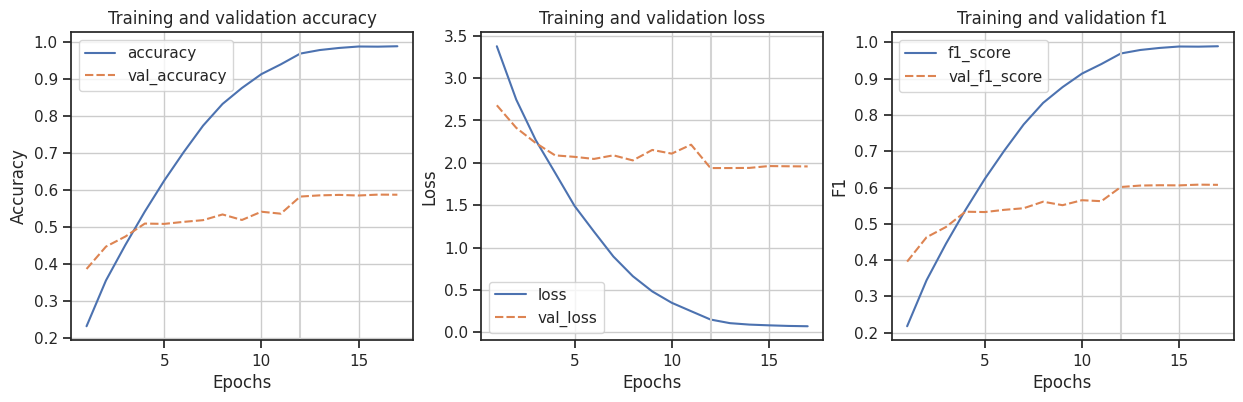

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_finetuning1'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning1.h5'))

166/166 [==============================] - 18s 98ms/step - loss: 2.0258 - accuracy: 0.5688 - f1_score: 0.5908

Test loss: 2.026
Test accuracy: 0.569
Test f1: 0.591

Accuracy on test data: 56.88 %
F1-Score on test data: 59.08 %

              precision    recall  f1-score   support

     abhori1       0.55      0.58      0.56        50
     afecuc1       1.00      0.82      0.90        28
     afghor1       0.57      0.80      0.67        20
     afmdov1       0.38      0.73      0.50        15
     afpfly1       0.15      0.26      0.19        31
     afpwag1       0.40      0.50      0.44        24
     afrgos1       0.42      0.62      0.50        24
     afrthr1       0.79      0.63      0.70        30
     amesun2       0.11      0.23      0.15        13
      barswa       0.60      0.37      0.46       166
     bawhor2       0.28      0.73      0.40        15
     bcbeat1       0.28      0.76      0.41        17
     beasun2       0.26      0.67      0.37        12
     bkctch1   

## Last block - model 3.5

In [ ]:
model_finetuning_1 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_gap_dense_relu_drop.h5'))

model_finetuning_1.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_1.get_layer('resnet50').layers:
  if layer.name == 'conv5_block2_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_1.summary())
for i, layer in enumerate(model_finetuning_1.get_layer('resnet50').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model_finetuning_1 = compile_model(model_finetuning_1, optimizer="adam")

In [ ]:
history_finetuning1 = run_model(model_finetuning_1, 'ResNet50_finetuning_3_5', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.7426 - accuracy: 0.5536 - f1_score: 0.5504
Epoch 1: val_loss improved from inf to 2.07375, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_3_5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1873s 6s/step - loss: 1.7426 - accuracy: 0.5536 - f1_score: 0.5504 - val_loss: 2.0737 - val_accuracy: 0.5071 - val_f1_score: 0.5287 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.3386 - accuracy: 0.6555 - f1_score: 0.6534
Epoch 2: val_loss did not improve from 2.07375
313/313 [==============================] - 56s 178ms/step - loss: 1.3386 - accuracy: 0.6555 - f1_score: 0.6534 - val_loss: 2.0763 - val_accuracy: 0.5013 - val_f1_score: 0.5239 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.0828 - accuracy: 0.7182 - f1_score: 0.7168
Epoch 3: val_loss improved from 2.07375 to 2.05042, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_3_5.h5
313/313 [==============================] - 60s 189ms/step - loss: 1.0828 - accuracy: 0.7182 - f1_score: 0.7168 - val_loss: 2.0504 - val_

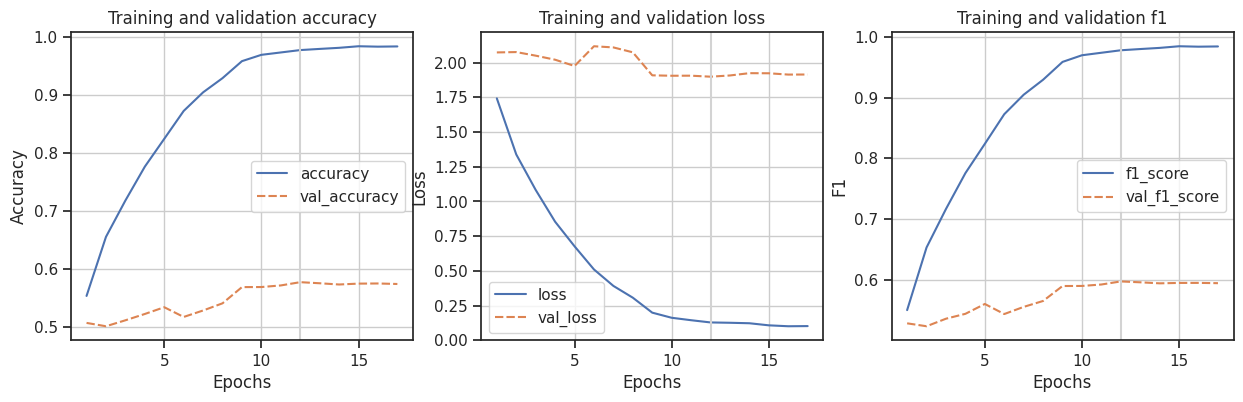

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_finetuning_3_5'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning_3_5.h5'))

166/166 [==============================] - 18s 95ms/step - loss: 1.9939 - accuracy: 0.5652 - f1_score: 0.5888

Test loss: 1.994
Test accuracy: 0.565
Test f1: 0.589

Accuracy on test data: 56.52 %
F1-Score on test data: 58.88 %

              precision    recall  f1-score   support

     abhori1       0.51      0.58      0.54        50
     afecuc1       1.00      0.82      0.90        28
     afghor1       0.44      0.75      0.56        20
     afmdov1       0.29      0.67      0.40        15
     afpfly1       0.12      0.23      0.16        31
     afpwag1       0.35      0.54      0.43        24
     afrgos1       0.54      0.62      0.58        24
     afrthr1       0.69      0.67      0.68        30
     amesun2       0.08      0.31      0.13        13
      barswa       0.68      0.37      0.48       166
     bawhor2       0.38      0.60      0.46        15
     bcbeat1       0.22      0.76      0.34        17
     beasun2       0.21      0.50      0.29        12
     bkctch1   

## Last two blocks - model 2_1

In [ ]:
model_finetuning_2 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_2_1.h5'))

model_finetuning_2.trainable = True
# fine-tune the last three elements
set_trainable = False

for layer in model_finetuning_2.get_layer('resnet50').layers:
  if layer.name == 'conv5_block1_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_2.summary())
for i, layer in enumerate(model_finetuning_2.get_layer('resnet50').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model_finetuning_2 = compile_model(model_finetuning_2, optimizer="adam")

In [ ]:
history_finetuning2 = run_model(model_finetuning_2, 'ResNet50_finetuning2', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 3.3428 - accuracy: 0.2351 - f1_score: 0.2210
Epoch 1: val_loss improved from inf to 2.55116, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 70s 204ms/step - loss: 3.3428 - accuracy: 0.2351 - f1_score: 0.2210 - val_loss: 2.5512 - val_accuracy: 0.4188 - val_f1_score: 0.4322 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 2.5290 - accuracy: 0.3999 - f1_score: 0.3905
Epoch 2: val_loss improved from 2.55116 to 2.15822, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning2.h5
313/313 [==============================] - 64s 202ms/step - loss: 2.5290 - accuracy: 0.3999 - f1_score: 0.3905 - val_loss: 2.1582 - val_accuracy: 0.4977 - val_f1_score: 0.5134 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.9312 - accuracy: 0.5337 - f1_score: 0.5289
Epoch 3: val_loss improved from 2.15822 to 2.11042, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_f

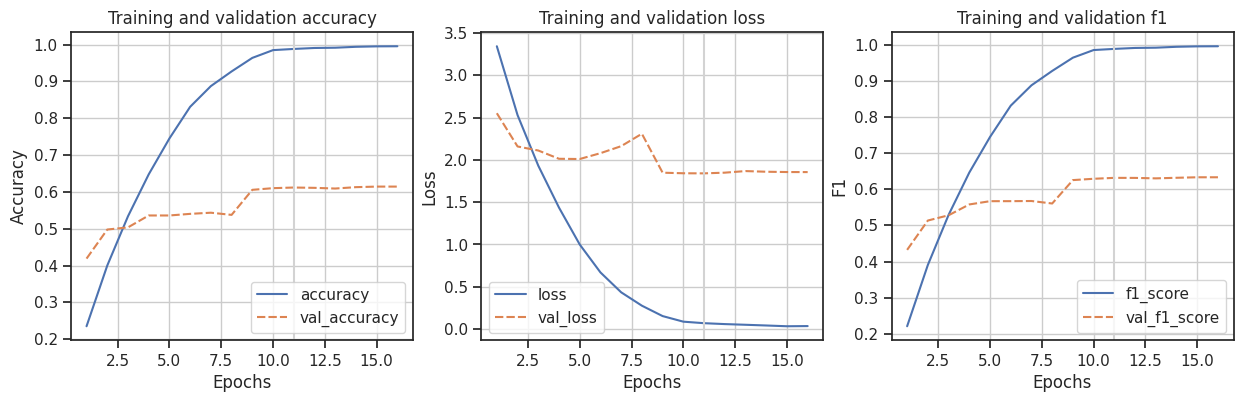

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_finetuning2'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning2.h5'))

166/166 [==============================] - 18s 100ms/step - loss: 1.9241 - accuracy: 0.6020 - f1_score: 0.6251

Test loss: 1.924
Test accuracy: 0.602
Test f1: 0.625

Accuracy on test data: 60.20 %
F1-Score on test data: 62.51 %

              precision    recall  f1-score   support

     abhori1       0.55      0.56      0.55        50
     afecuc1       0.88      0.82      0.85        28
     afghor1       0.45      0.65      0.53        20
     afmdov1       0.46      0.73      0.56        15
     afpfly1       0.23      0.35      0.28        31
     afpwag1       0.33      0.62      0.43        24
     afrgos1       0.50      0.79      0.61        24
     afrthr1       0.84      0.70      0.76        30
     amesun2       0.06      0.23      0.09        13
      barswa       0.67      0.46      0.55       166
     bawhor2       0.22      0.67      0.33        15
     bcbeat1       0.24      0.76      0.37        17
     beasun2       0.24      0.50      0.32        12
     bkctch1  

## Last two blocks - model 3_5

In [ ]:
model_finetuning_2 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_gap_dense_relu_drop.h5'))

model_finetuning_2.trainable = True
# fine-tune the last three elements
set_trainable = False

for layer in model_finetuning_2.get_layer('resnet50').layers:
  if layer.name == 'conv5_block1_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_2.summary())
for i, layer in enumerate(model_finetuning_2.get_layer('resnet50').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model_finetuning_2 = compile_model(model_finetuning_2, optimizer="adam")

In [ ]:
history_finetuning2 = run_model(model_finetuning_2, 'ResNet50_finetuning2_3_5', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.9700 - accuracy: 0.4991 - f1_score: 0.4949
Epoch 1: val_loss improved from inf to 2.05240, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning2_3_5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 68s 198ms/step - loss: 1.9700 - accuracy: 0.4991 - f1_score: 0.4949 - val_loss: 2.0524 - val_accuracy: 0.5097 - val_f1_score: 0.5315 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.3594 - accuracy: 0.6455 - f1_score: 0.6423
Epoch 2: val_loss improved from 2.05240 to 1.91827, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning2_3_5.h5
313/313 [==============================] - 63s 201ms/step - loss: 1.3594 - accuracy: 0.6455 - f1_score: 0.6423 - val_loss: 1.9183 - val_accuracy: 0.5406 - val_f1_score: 0.5613 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.9657 - accuracy: 0.7476 - f1_score: 0.7463
Epoch 3: val_loss did not improve from 1.91827
313/313 [==============================] - 61s 193ms/step - loss: 0.9657 - accuracy: 0.7476 - f1_score: 0.7463 - val_loss: 1.9321 - va

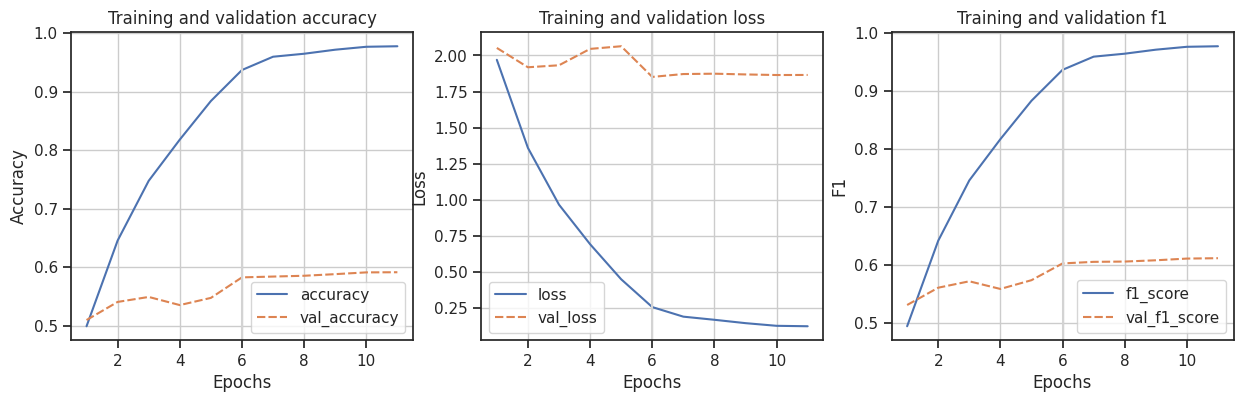

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'ResNet50_finetuning2_3_5'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning2_3_5.h5'))

166/166 [==============================] - 18s 98ms/step - loss: 1.9094 - accuracy: 0.5793 - f1_score: 0.6038

Test loss: 1.909
Test accuracy: 0.579
Test f1: 0.604

Accuracy on test data: 57.93 %
F1-Score on test data: 60.38 %

              precision    recall  f1-score   support

     abhori1       0.56      0.54      0.55        50
     afecuc1       0.96      0.82      0.88        28
     afghor1       0.55      0.90      0.68        20
     afmdov1       0.30      0.60      0.40        15
     afpfly1       0.15      0.26      0.19        31
     afpwag1       0.30      0.58      0.40        24
     afrgos1       0.49      0.71      0.58        24
     afrthr1       0.72      0.70      0.71        30
     amesun2       0.05      0.15      0.07        13
      barswa       0.70      0.43      0.53       166
     bawhor2       0.38      0.73      0.50        15
     bcbeat1       0.20      0.82      0.33        17
     beasun2       0.21      0.50      0.30        12
     bkctch1   

# Remove last block

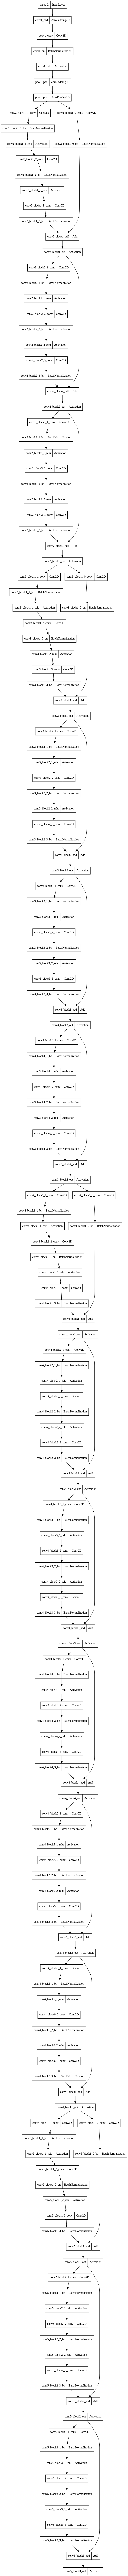

In [ ]:
keras.utils.plot_model(conv_base)

##Feature extraction - 1

In [ ]:
layer_name = 'conv5_block2_out'
intermediate_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output, name='resnet50_no_last_block')

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = intermediate_model(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

print(model4.summary())
for i, layer in enumerate(model4.get_layer('resnet50_no_last_block').layers):
    print(i, layer.name, layer.trainable)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_6  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_6 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_block (Fu  (None, 7, 7, 2048)        19115904  
 nctional)                                                       
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model4 = compile_model(model4)

In [ ]:
history4 = run_model(model4, 'ResNet50_removeblock_1', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5238 - accuracy: 0.0292 - f1_score: 0.0264
Epoch 1: val_loss improved from inf to 4.27350, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 59s 176ms/step - loss: 4.5238 - accuracy: 0.0292 - f1_score: 0.0264 - val_loss: 4.2735 - val_accuracy: 0.1114 - val_f1_score: 0.1116 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.1718 - accuracy: 0.0843 - f1_score: 0.0742
Epoch 2: val_loss improved from 4.27350 to 3.87797, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1.h5
313/313 [==============================] - 56s 176ms/step - loss: 4.1718 - accuracy: 0.0843 - f1_score: 0.0742 - val_loss: 3.8780 - val_accuracy: 0.1992 - val_f1_score: 0.2055 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.8580 - accuracy: 0.1328 - f1_score: 0.1181
Epoch 3: val_loss improved from 3.87797 to 3.51608, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50

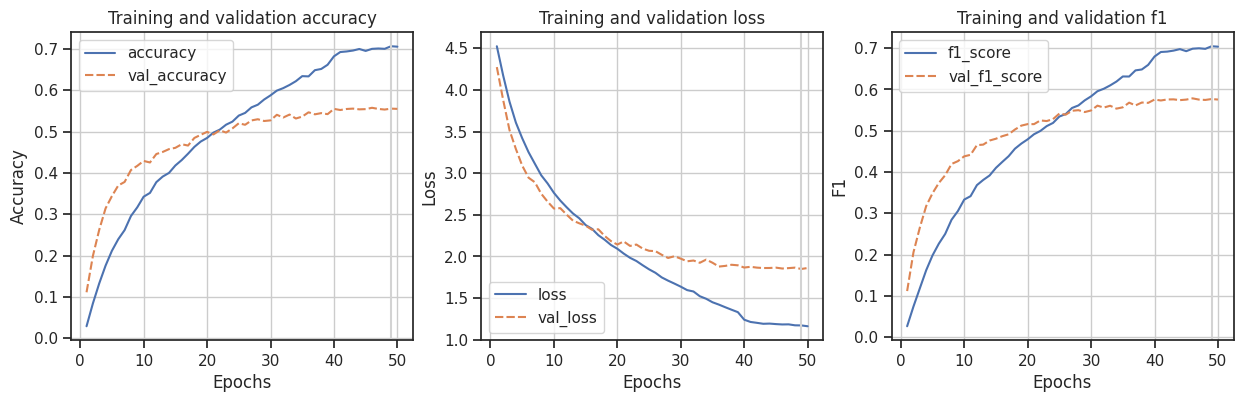

In [ ]:
plot_model_performance(history4, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + 'ResNet50_removeblock_1.h5'))

166/166 [==============================] - 17s 95ms/step - loss: 1.9002 - accuracy: 0.5441 - f1_score: 0.5679

Test loss: 1.900
Test accuracy: 0.544
Test f1: 0.568

Accuracy on test data: 54.41 %
F1-Score on test data: 56.79 %

              precision    recall  f1-score   support

     abhori1       0.49      0.50      0.50        50
     afecuc1       0.76      0.79      0.77        28
     afghor1       0.39      0.60      0.47        20
     afmdov1       0.32      0.67      0.43        15
     afpfly1       0.10      0.13      0.11        31
     afpwag1       0.39      0.58      0.47        24
     afrgos1       0.48      0.67      0.56        24
     afrthr1       0.62      0.67      0.65        30
     amesun2       0.06      0.15      0.09        13
      barswa       0.63      0.28      0.39       166
     bawhor2       0.26      0.73      0.39        15
     bcbeat1       0.15      0.82      0.25        17
     beasun2       0.23      0.58      0.33        12
     bkctch1   

##Feature extraction - 2

In [ ]:
layer_name = 'conv5_block2_out'
intermediate_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output, name='resnet50_no_last_block')

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = intermediate_model(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

print(model4.summary())
for i, layer in enumerate(model4.get_layer('resnet50_no_last_block').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_block (Fu  (None, 7, 7, 2048)        19115904  
 nctional)                                                       
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model4 = compile_model(model4)

In [ ]:
history4 = run_model(model4, 'ResNet50_removeblock_1_3_5', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5943 - accuracy: 0.0237 - f1_score: 0.0196
Epoch 1: val_loss improved from inf to 4.41771, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_3_5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 58s 175ms/step - loss: 4.5943 - accuracy: 0.0237 - f1_score: 0.0196 - val_loss: 4.4177 - val_accuracy: 0.0529 - val_f1_score: 0.0337 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.3121 - accuracy: 0.0615 - f1_score: 0.0526
Epoch 2: val_loss improved from 4.41771 to 4.14597, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_3_5.h5
313/313 [==============================] - 55s 173ms/step - loss: 4.3121 - accuracy: 0.0615 - f1_score: 0.0526 - val_loss: 4.1460 - val_accuracy: 0.1255 - val_f1_score: 0.1235 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 4.0781 - accuracy: 0.1032 - f1_score: 0.0920
Epoch 3: val_loss improved from 4.14597 to 3.86683, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResN

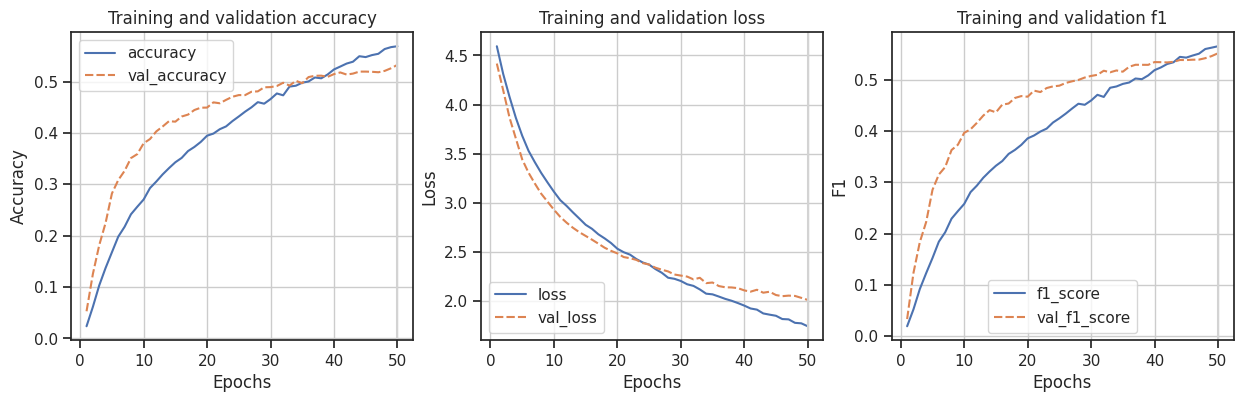

In [ ]:
plot_model_performance(history4, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + 'ResNet50_removeblock_1_3_5.h5'))

166/166 [==============================] - 17s 95ms/step - loss: 2.0492 - accuracy: 0.5217 - f1_score: 0.5427

Test loss: 2.049
Test accuracy: 0.522
Test f1: 0.543

Accuracy on test data: 52.17 %
F1-Score on test data: 54.27 %

              precision    recall  f1-score   support

     abhori1       0.36      0.40      0.38        50
     afecuc1       0.78      0.75      0.76        28
     afghor1       0.48      0.70      0.57        20
     afmdov1       0.26      0.60      0.36        15
     afpfly1       0.29      0.16      0.21        31
     afpwag1       0.32      0.50      0.39        24
     afrgos1       0.43      0.75      0.55        24
     afrthr1       0.54      0.73      0.62        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.60      0.23      0.34       166
     bawhor2       0.20      0.60      0.31        15
     bcbeat1       0.13      0.88      0.22        17
     beasun2       0.30      0.67      0.41        12
     bkctch1   

## Fine tuning - 1

In [ ]:
model_finetuning = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_removeblock_1.h5'))


model_finetuning.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning.get_layer('resnet50_no_last_block').layers:
  if layer.name == 'conv5_block1_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning.summary())
for i, layer in enumerate(model_finetuning.get_layer('resnet50_no_last_block').layers):
    print(i, layer.name, layer.trainable)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_block (Fu  (None, 7, 7, 2048)        19115904  
 nctional)                                                       
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model_finetuning = compile_model(model_finetuning)

In [ ]:
history_ft1 = run_model(model_finetuning, 'ResNet50_removeblock_1_ft', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.5507 - accuracy: 0.5930 - f1_score: 0.5901
Epoch 1: val_loss improved from inf to 1.94454, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_ft.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 61s 179ms/step - loss: 1.5507 - accuracy: 0.5930 - f1_score: 0.5901 - val_loss: 1.9445 - val_accuracy: 0.5349 - val_f1_score: 0.5536 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1338 - accuracy: 0.6908 - f1_score: 0.6891
Epoch 2: val_loss improved from 1.94454 to 1.87808, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_ft.h5
313/313 [==============================] - 58s 183ms/step - loss: 1.1338 - accuracy: 0.6908 - f1_score: 0.6891 - val_loss: 1.8781 - val_accuracy: 0.5504 - val_f1_score: 0.5719 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.8957 - accuracy: 0.7575 - f1_score: 0.7563
Epoch 3: val_loss did not improve from 1.87808
313/313 [==============================] - 56s 177ms/step - loss: 0.8957 - accuracy: 0.7575 - f1_score: 0.7563 - val_loss: 1.9156 - v

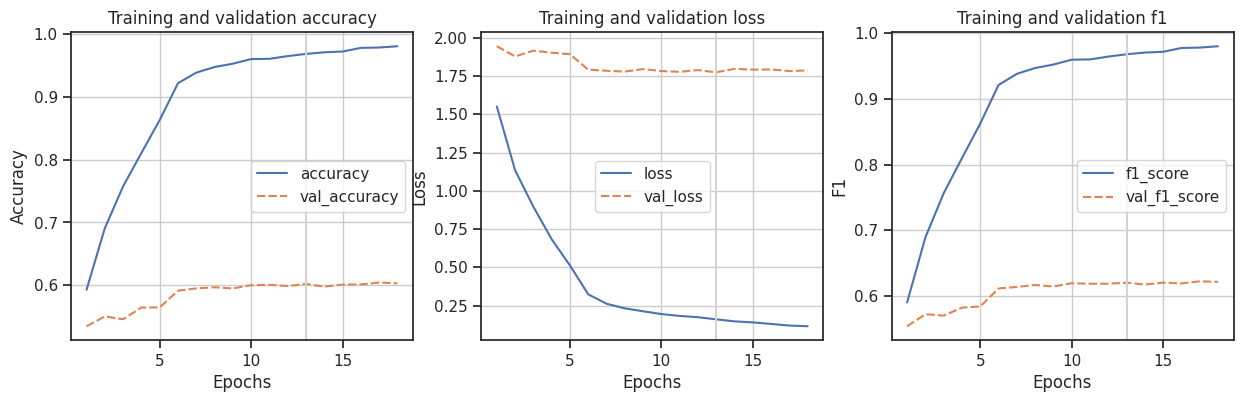

In [ ]:
plot_model_performance(history_ft1, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + 'ResNet50_removeblock_1_ft.h5'))

166/166 [==============================] - 18s 95ms/step - loss: 1.8594 - accuracy: 0.5920 - f1_score: 0.6135

Test loss: 1.859
Test accuracy: 0.592
Test f1: 0.613

Accuracy on test data: 59.20 %
F1-Score on test data: 61.35 %

              precision    recall  f1-score   support

     abhori1       0.46      0.52      0.49        50
     afecuc1       0.96      0.89      0.93        28
     afghor1       0.41      0.65      0.50        20
     afmdov1       0.45      0.67      0.54        15
     afpfly1       0.13      0.23      0.16        31
     afpwag1       0.41      0.58      0.48        24
     afrgos1       0.58      0.62      0.60        24
     afrthr1       0.62      0.77      0.69        30
     amesun2       0.10      0.38      0.16        13
      barswa       0.67      0.42      0.52       166
     bawhor2       0.34      0.80      0.48        15
     bcbeat1       0.21      0.76      0.33        17
     beasun2       0.26      0.75      0.39        12
     bkctch1   

## Fine tuning - 2

In [ ]:
model_finetuning = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_removeblock_1_3_5.h5'))


model_finetuning.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning.get_layer('resnet50_no_last_block').layers:
  if layer.name == 'conv5_block1_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning.summary())
for i, layer in enumerate(model_finetuning.get_layer('resnet50_no_last_block').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_block (Fu  (None, 7, 7, 2048)        19115904  
 nctional)                                                       
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model_finetuning = compile_model(model_finetuning)

In [ ]:
history_ft1 = run_model(model_finetuning, 'ResNet50_removeblock_1_ft_2', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.8736 - accuracy: 0.5237 - f1_score: 0.5187
Epoch 1: val_loss improved from inf to 1.93296, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_ft_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 61s 177ms/step - loss: 1.8736 - accuracy: 0.5237 - f1_score: 0.5187 - val_loss: 1.9330 - val_accuracy: 0.5398 - val_f1_score: 0.5580 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.4972 - accuracy: 0.6116 - f1_score: 0.6084
Epoch 2: val_loss improved from 1.93296 to 1.82295, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_removeblock_1_ft_2.h5
313/313 [==============================] - 57s 182ms/step - loss: 1.4972 - accuracy: 0.6116 - f1_score: 0.6084 - val_loss: 1.8230 - val_accuracy: 0.5588 - val_f1_score: 0.5739 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.2118 - accuracy: 0.6837 - f1_score: 0.6809
Epoch 3: val_loss improved from 1.82295 to 1.79481, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/Res

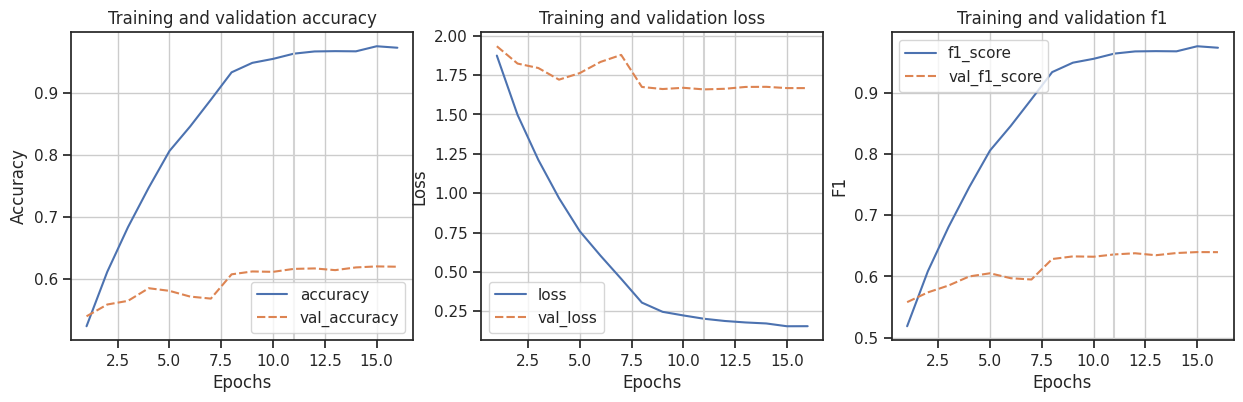

In [ ]:
plot_model_performance(history_ft1, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + 'ResNet50_removeblock_1_ft_2.h5'))

166/166 [==============================] - 17s 94ms/step - loss: 1.7247 - accuracy: 0.6054 - f1_score: 0.6263

Test loss: 1.725
Test accuracy: 0.605
Test f1: 0.626

Accuracy on test data: 60.54 %
F1-Score on test data: 62.63 %

              precision    recall  f1-score   support

     abhori1       0.53      0.50      0.52        50
     afecuc1       0.95      0.75      0.84        28
     afghor1       0.48      0.75      0.59        20
     afmdov1       0.38      0.67      0.49        15
     afpfly1       0.17      0.35      0.23        31
     afpwag1       0.44      0.62      0.52        24
     afrgos1       0.53      0.71      0.61        24
     afrthr1       0.70      0.70      0.70        30
     amesun2       0.02      0.08      0.04        13
      barswa       0.70      0.45      0.55       166
     bawhor2       0.36      0.80      0.50        15
     bcbeat1       0.26      0.94      0.41        17
     beasun2       0.25      0.75      0.38        12
     bkctch1   

# Remove last 2 blocks

## Feature extraction (1)

In [ ]:
layer_name = 'conv5_block1_out'
intermediate_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output, name='resnet50_no_last_2_blocks')

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = intermediate_model(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model4_1 = keras.Model(inputs=inputs, outputs=outputs)

print(model4_1.summary())

for i, layer in enumerate(model4_1.get_layer('resnet50_no_last_2_blocks').layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model4_1 = compile_model(model4_1)

In [ ]:
history4_1 = run_model(model4_1, 'ResNet50_no2blocks', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5551 - accuracy: 0.0259 - f1_score: 0.0214
Epoch 1: val_loss improved from inf to 4.34341, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_no2blocks.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 62s 175ms/step - loss: 4.5551 - accuracy: 0.0259 - f1_score: 0.0214 - val_loss: 4.3434 - val_accuracy: 0.0520 - val_f1_score: 0.0335 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.2578 - accuracy: 0.0691 - f1_score: 0.0619
Epoch 2: val_loss improved from 4.34341 to 4.04387, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_no2blocks.h5
313/313 [==============================] - 54s 172ms/step - loss: 4.2571 - accuracy: 0.0694 - f1_score: 0.0622 - val_loss: 4.0439 - val_accuracy: 0.1127 - val_f1_score: 0.0960 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 3.9785 - accuracy: 0.1115 - f1_score: 0.1017
Epoch 3: val_loss improved from 4.04387 to 3.67566, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_no2

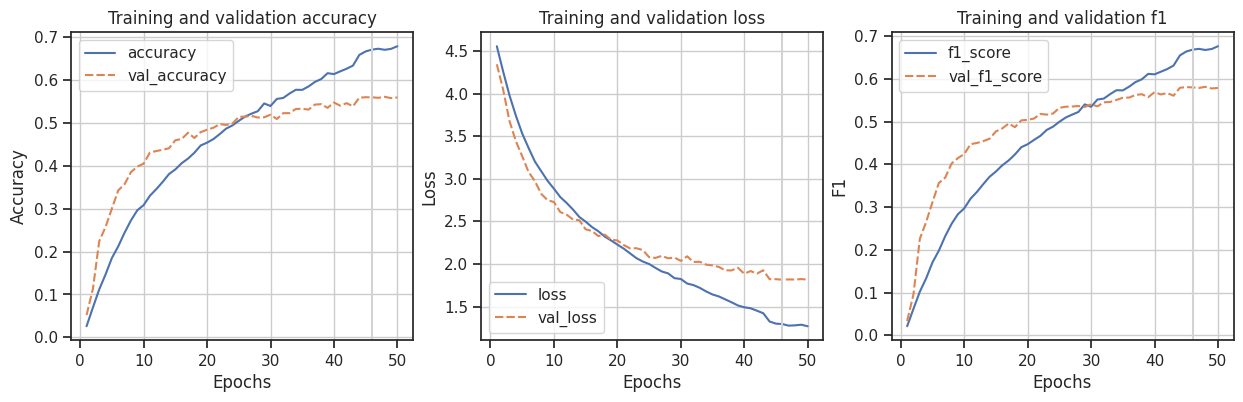

In [ ]:
plot_model_performance(history4_1, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_no2blocks.h5'))

166/166 [==============================] - 17s 93ms/step - loss: 1.8537 - accuracy: 0.5554 - f1_score: 0.5796

Test loss: 1.854
Test accuracy: 0.555
Test f1: 0.580

Accuracy on test data: 55.54 %
F1-Score on test data: 57.96 %

              precision    recall  f1-score   support

     abhori1       0.48      0.46      0.47        50
     afecuc1       0.89      0.86      0.87        28
     afghor1       0.57      0.60      0.59        20
     afmdov1       0.38      0.60      0.46        15
     afpfly1       0.18      0.19      0.19        31
     afpwag1       0.41      0.58      0.48        24
     afrgos1       0.39      0.58      0.47        24
     afrthr1       0.58      0.73      0.65        30
     amesun2       0.03      0.08      0.04        13
      barswa       0.54      0.36      0.43       166
     bawhor2       0.36      0.53      0.43        15
     bcbeat1       0.18      0.82      0.30        17
     beasun2       0.23      0.50      0.32        12
     bkctch1   

## Feature extraction (2)

In [ ]:
layer_name = 'conv5_block1_out'
intermediate_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output, name='resnet50_no_last_2_blocks')

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = intermediate_model(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model4_1 = keras.Model(inputs=inputs, outputs=outputs)

print(model4_1.summary())

for i, layer in enumerate(model4_1.get_layer('resnet50_no_last_2_blocks').layers):
    print(i, layer.name, layer.trainable)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_4  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_4 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model4_1 = compile_model(model4_1)

In [ ]:
history4_1 = run_model(model4_1, 'ResNet50_no2blocks_1', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5184 - accuracy: 0.0801 - f1_score: 0.0749
Epoch 1: val_loss improved from inf to 3.55824, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_no2blocks_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 55s 164ms/step - loss: 4.5184 - accuracy: 0.0801 - f1_score: 0.0749 - val_loss: 3.5582 - val_accuracy: 0.2735 - val_f1_score: 0.2818 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.4735 - accuracy: 0.2155 - f1_score: 0.2070
Epoch 2: val_loss improved from 3.55824 to 2.86284, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_no2blocks_1.h5
313/313 [==============================] - 52s 165ms/step - loss: 3.4735 - accuracy: 0.2155 - f1_score: 0.2070 - val_loss: 2.8628 - val_accuracy: 0.3895 - val_f1_score: 0.4074 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 2.9532 - accuracy: 0.3098 - f1_score: 0.3042
Epoch 3: val_loss improved from 2.86284 to 2.58521, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_n

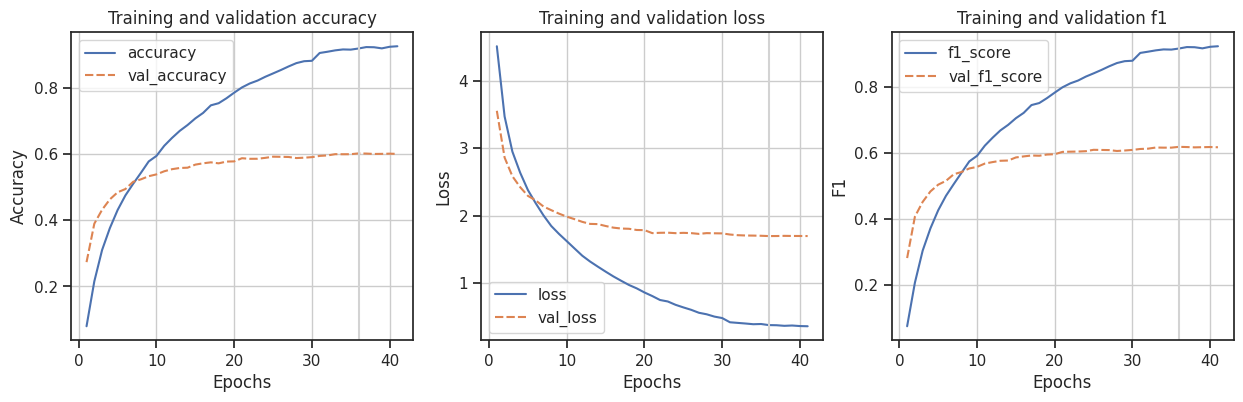

In [ ]:
plot_model_performance(history4_1, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_no2blocks_1.h5'))

166/166 [==============================] - 16s 90ms/step - loss: 1.7556 - accuracy: 0.5850 - f1_score: 0.6062

Test loss: 1.756
Test accuracy: 0.585
Test f1: 0.606

Accuracy on test data: 58.50 %
F1-Score on test data: 60.62 %

              precision    recall  f1-score   support

     abhori1       0.48      0.54      0.51        50
     afecuc1       0.81      0.75      0.78        28
     afghor1       0.52      0.75      0.61        20
     afmdov1       0.36      0.60      0.45        15
     afpfly1       0.24      0.32      0.27        31
     afpwag1       0.38      0.62      0.47        24
     afrgos1       0.38      0.62      0.47        24
     afrthr1       0.59      0.73      0.66        30
     amesun2       0.03      0.08      0.04        13
      barswa       0.62      0.42      0.50       166
     bawhor2       0.29      0.67      0.41        15
     bcbeat1       0.18      0.88      0.29        17
     beasun2       0.24      0.67      0.36        12
     bkctch1   

## Fine tuning

### Unfroze 1 block (1)

In [ ]:
model_finetuning_7 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_no2blocks.h5'))


model_finetuning_7.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_7.get_layer('resnet50_no_last_2_blocks').layers:
  if layer.name == 'conv4_block6_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_7.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model_finetuning_7 = compile_model(model_finetuning_7, optimizer="adam")

In [ ]:
history_finetuning7 = run_model(model_finetuning_7, 'ResNet50_finetuning_2blocks', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.0792 - accuracy: 0.4980 - f1_score: 0.4941
Epoch 1: val_loss improved from inf to 2.09772, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_2blocks.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 64s 185ms/step - loss: 2.0792 - accuracy: 0.4980 - f1_score: 0.4941 - val_loss: 2.0977 - val_accuracy: 0.5105 - val_f1_score: 0.5416 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.3408 - accuracy: 0.6446 - f1_score: 0.6422
Epoch 2: val_loss improved from 2.09772 to 2.02755, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_2blocks.h5
313/313 [==============================] - 58s 183ms/step - loss: 1.3408 - accuracy: 0.6446 - f1_score: 0.6422 - val_loss: 2.0275 - val_accuracy: 0.5285 - val_f1_score: 0.5568 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.0275 - accuracy: 0.7159 - f1_score: 0.7144
Epoch 3: val_loss improved from 2.02755 to 1.87305, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/Res

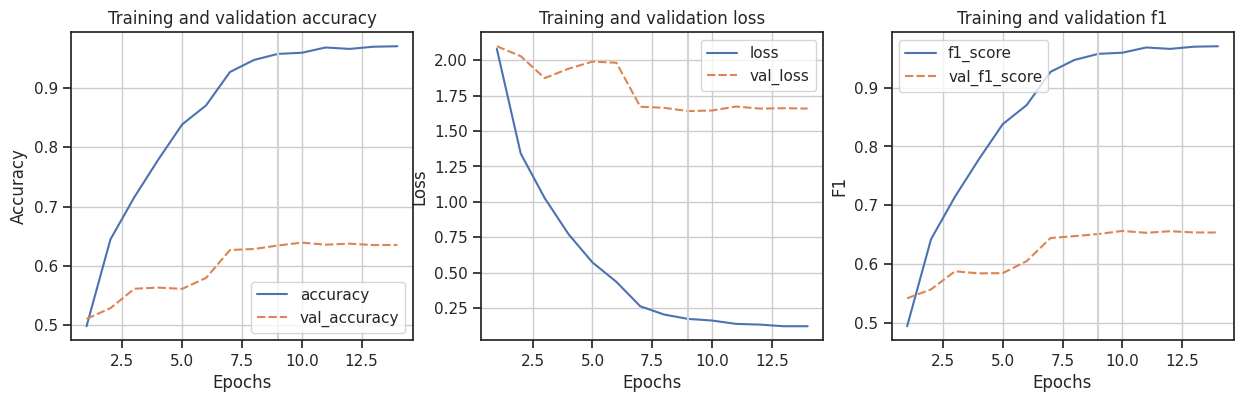

In [ ]:
plot_model_performance(history_finetuning7, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning_2blocks.h5'))

166/166 [==============================] - 17s 95ms/step - loss: 1.7136 - accuracy: 0.6295 - f1_score: 0.6483

Test loss: 1.714
Test accuracy: 0.629
Test f1: 0.648

Accuracy on test data: 62.95 %
F1-Score on test data: 64.83 %

              precision    recall  f1-score   support

     abhori1       0.60      0.64      0.62        50
     afecuc1       0.83      0.89      0.86        28
     afghor1       0.73      0.80      0.76        20
     afmdov1       0.41      0.73      0.52        15
     afpfly1       0.21      0.35      0.27        31
     afpwag1       0.39      0.67      0.49        24
     afrgos1       0.44      0.62      0.52        24
     afrthr1       0.61      0.73      0.67        30
     amesun2       0.09      0.23      0.13        13
      barswa       0.61      0.45      0.52       166
     bawhor2       0.43      0.67      0.53        15
     bcbeat1       0.26      0.94      0.41        17
     beasun2       0.40      0.67      0.50        12
     bkctch1   

### Unfroze 1 block (2)

In [ ]:
model_finetuning_7 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_no2blocks_1.h5'))


model_finetuning_7.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_7.get_layer('resnet50_no_last_2_blocks').layers:
  if layer.name == 'conv4_block6_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_7.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model_finetuning_7 = compile_model(model_finetuning_7, optimizer="adam")

In [ ]:
history_finetuning7 = run_model(model_finetuning_7, 'ResNet50_finetuning_2blocks_1', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.8675 - accuracy: 0.5470 - f1_score: 0.5431
Epoch 1: val_loss improved from inf to 1.79472, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_2blocks_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 60s 174ms/step - loss: 1.8675 - accuracy: 0.5470 - f1_score: 0.5431 - val_loss: 1.7947 - val_accuracy: 0.5681 - val_f1_score: 0.5907 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1761 - accuracy: 0.6881 - f1_score: 0.6865
Epoch 2: val_loss improved from 1.79472 to 1.75020, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_finetuning_2blocks_1.h5
313/313 [==============================] - 56s 177ms/step - loss: 1.1761 - accuracy: 0.6881 - f1_score: 0.6865 - val_loss: 1.7502 - val_accuracy: 0.5866 - val_f1_score: 0.6076 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.8665 - accuracy: 0.7613 - f1_score: 0.7603
Epoch 3: val_loss improved from 1.75020 to 1.65287, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/R

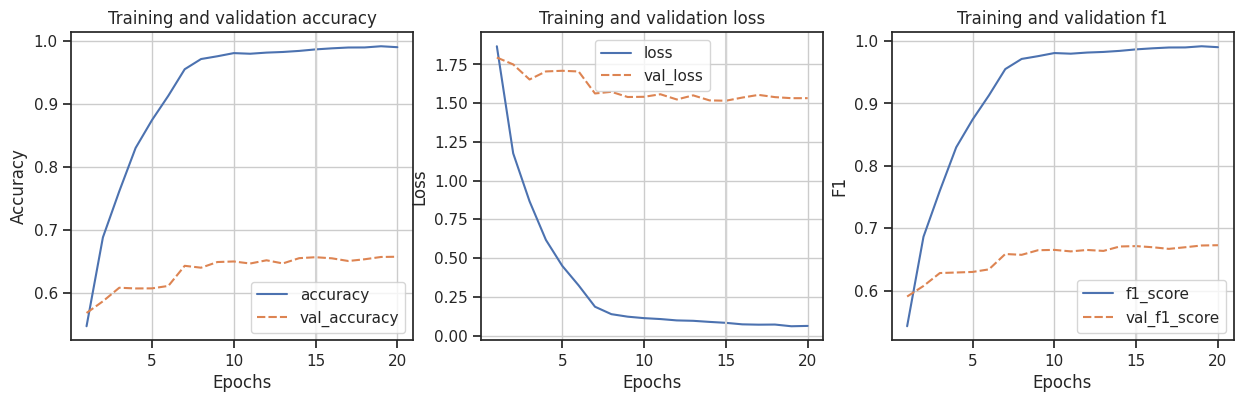

In [ ]:
plot_model_performance(history_finetuning7, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_finetuning_2blocks_1.h5'))

166/166 [==============================] - 17s 91ms/step - loss: 1.5935 - accuracy: 0.6487 - f1_score: 0.6664

Test loss: 1.594
Test accuracy: 0.649
Test f1: 0.666

Accuracy on test data: 64.87 %
F1-Score on test data: 66.64 %

              precision    recall  f1-score   support

     abhori1       0.65      0.62      0.63        50
     afecuc1       0.96      0.89      0.93        28
     afghor1       0.62      0.75      0.68        20
     afmdov1       0.55      0.80      0.65        15
     afpfly1       0.21      0.42      0.28        31
     afpwag1       0.40      0.79      0.54        24
     afrgos1       0.50      0.67      0.57        24
     afrthr1       0.68      0.77      0.72        30
     amesun2       0.08      0.23      0.12        13
      barswa       0.68      0.51      0.58       166
     bawhor2       0.39      0.73      0.51        15
     bcbeat1       0.24      0.88      0.37        17
     beasun2       0.39      0.75      0.51        12
     bkctch1   

### unfroze 2 blocks

In [ ]:
model_finetuning_8 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_no2blocks.h5'))


model_finetuning_8.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_8.get_layer('resnet50_no_last_2_blocks').layers:
  if layer.name == 'conv4_block5_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_8.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model_finetuning_8 = compile_model(model_finetuning_8, optimizer="adam")

In [ ]:
history_finetuning8 = run_model(model_finetuning_7, 'ResNet_2ft_2blocks', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9767 - f1_score: 0.9767
Epoch 1: val_loss improved from inf to 1.65981, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet_2ft_2blocks.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 57s 179ms/step - loss: 0.1071 - accuracy: 0.9767 - f1_score: 0.9767 - val_loss: 1.6598 - val_accuracy: 0.6381 - val_f1_score: 0.6561 - lr: 1.0000e-07
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9754 - f1_score: 0.9754
Epoch 2: val_loss improved from 1.65981 to 1.65961, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet_2ft_2blocks.h5
313/313 [==============================] - 57s 181ms/step - loss: 0.1067 - accuracy: 0.9754 - f1_score: 0.9754 - val_loss: 1.6596 - val_accuracy: 0.6379 - val_f1_score: 0.6558 - lr: 1.0000e-07
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9770 - f1_score: 0.9770
Epoch 3: val_loss improved from 1.65961 to 1.65900, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet_2ft_2

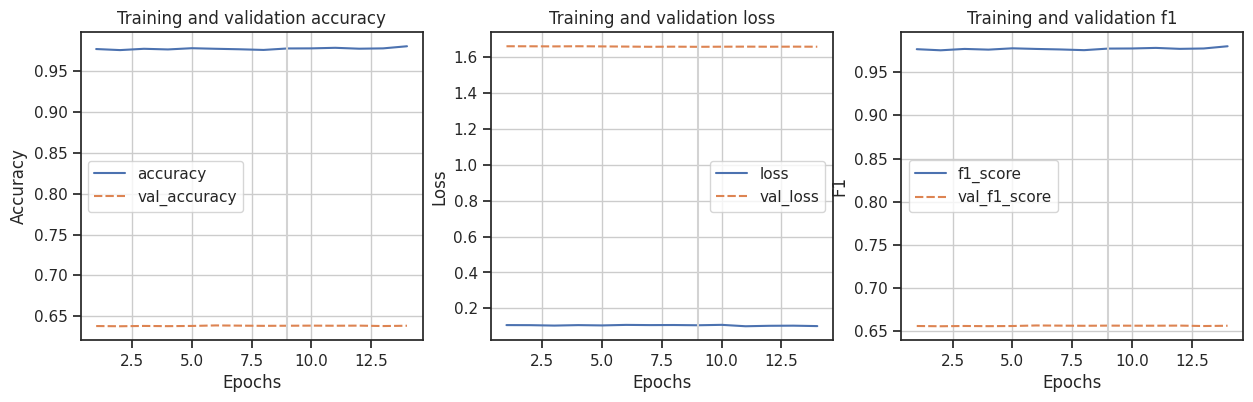

In [ ]:
plot_model_performance(history_finetuning8, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet_2ft_2blocks.h5'))

166/166 [==============================] - 17s 92ms/step - loss: 1.7222 - accuracy: 0.6368 - f1_score: 0.6566

Test loss: 1.722
Test accuracy: 0.637
Test f1: 0.657

Accuracy on test data: 63.68 %
F1-Score on test data: 65.66 %

              precision    recall  f1-score   support

     abhori1       0.67      0.62      0.65        50
     afecuc1       1.00      0.86      0.92        28
     afghor1       0.64      0.80      0.71        20
     afmdov1       0.46      0.73      0.56        15
     afpfly1       0.20      0.29      0.24        31
     afpwag1       0.43      0.62      0.51        24
     afrgos1       0.47      0.67      0.55        24
     afrthr1       0.67      0.73      0.70        30
     amesun2       0.07      0.23      0.11        13
      barswa       0.65      0.50      0.57       166
     bawhor2       0.42      0.67      0.51        15
     bcbeat1       0.30      1.00      0.46        17
     beasun2       0.24      0.67      0.35        12
     bkctch1   

# Remove last 3 blocks

## Feature extraction

In [ ]:
layer_name = 'conv4_block6_out'
intermediate_model = Model(inputs=conv_base.input, outputs=conv_base.get_layer(layer_name).output, name='ResNet50_no3blocks')

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = intermediate_model(x) # feature extraction
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation='softmax', name = 'predictions')(x)
model4_2 = keras.Model(inputs=inputs, outputs=outputs)

print(model4_2.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_2  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 ResNet50_no3blocks (Functi  (None, 14, 14, 1024)      8589184   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model4_2 = compile_model(model4_2)

In [ ]:
history4_2 = run_model(model4_2, 'ResNet50_fe_3blocks', train_set, validation_set, MODEL_FOLDER, epochs=50)

Epoch 1/50
312/313 [============================>.] - ETA: 0s - loss: 4.6087 - accuracy: 0.0156 - f1_score: 0.0126
Epoch 1: val_loss improved from inf to 4.56997, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_fe_3blocks.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 56s 168ms/step - loss: 4.6085 - accuracy: 0.0158 - f1_score: 0.0128 - val_loss: 4.5700 - val_accuracy: 0.0213 - val_f1_score: 0.0093 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.5118 - accuracy: 0.0280 - f1_score: 0.0230
Epoch 2: val_loss improved from 4.56997 to 4.45436, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_fe_3blocks.h5
313/313 [==============================] - 52s 164ms/step - loss: 4.5117 - accuracy: 0.0281 - f1_score: 0.0230 - val_loss: 4.4544 - val_accuracy: 0.0407 - val_f1_score: 0.0262 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.3990 - accuracy: 0.0477 - f1_score: 0.0395
Epoch 3: val_loss improved from 4.45436 to 4.33094, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNet50_fe

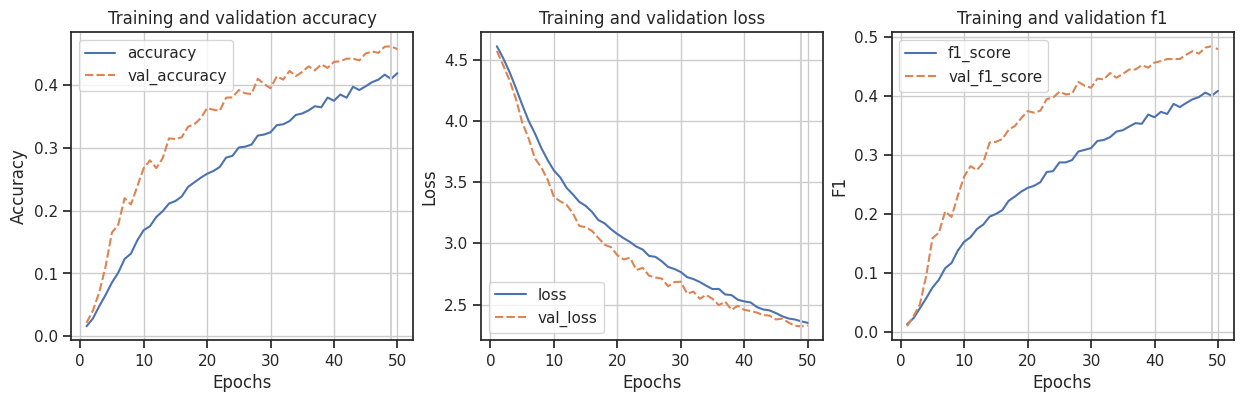

In [ ]:
plot_model_performance(history4_2, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNet50_fe_3blocks.h5'))

166/166 [==============================] - 16s 89ms/step - loss: 2.3752 - accuracy: 0.4529 - f1_score: 0.4758

Test loss: 2.375
Test accuracy: 0.453
Test f1: 0.476

Accuracy on test data: 45.29 %
F1-Score on test data: 47.58 %

              precision    recall  f1-score   support

     abhori1       0.38      0.36      0.37        50
     afecuc1       0.57      0.71      0.63        28
     afghor1       0.44      0.55      0.49        20
     afmdov1       0.21      0.53      0.30        15
     afpfly1       0.14      0.03      0.05        31
     afpwag1       0.28      0.33      0.30        24
     afrgos1       0.26      0.54      0.35        24
     afrthr1       0.49      0.70      0.58        30
     amesun2       0.04      0.15      0.07        13
      barswa       0.47      0.19      0.27       166
     bawhor2       0.23      0.47      0.31        15
     bcbeat1       0.12      0.71      0.21        17
     beasun2       0.15      0.42      0.22        12
     bkctch1   

## Fine tuning

In [ ]:
model_finetuning_8 = models.load_model(os.path.join(MODEL_FOLDER, 'ResNet50_no2blocks.h5'))


model_finetuning_8.trainable = True
# fine-tune the last three elements
set_trainable = False
for layer in model_finetuning_8.get_layer('resnet50_no_last_2_blocks').layers:
  if layer.name == 'conv4_block5_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_finetuning_8.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50_no_last_2_blocks   (None, 7, 7, 2048)        14644096  
 (Functional)                                                    
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model_finetuning_8 = compile_model(model_finetuning_8, optimizer="adam")

In [ ]:
history_finetuning8 = run_model(model_finetuning_7, 'ResNetft_3blocks', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9719 - f1_score: 0.9718
Epoch 1: val_loss improved from inf to 1.65338, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNetft_3blocks.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 57s 180ms/step - loss: 0.1239 - accuracy: 0.9719 - f1_score: 0.9718 - val_loss: 1.6534 - val_accuracy: 0.6364 - val_f1_score: 0.6546 - lr: 1.0000e-06
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9758 - f1_score: 0.9758
Epoch 2: val_loss did not improve from 1.65338
313/313 [==============================] - 56s 177ms/step - loss: 0.1113 - accuracy: 0.9758 - f1_score: 0.9758 - val_loss: 1.6535 - val_accuracy: 0.6384 - val_f1_score: 0.6562 - lr: 1.0000e-06
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9744 - f1_score: 0.9744
Epoch 3: val_loss improved from 1.65338 to 1.65333, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/ResNet50/ResNetft_3blocks.h5
313/313 [==============================] - 58s 182ms/step - loss: 0.1159 - accuracy: 0.9744 - f1_score: 0.9744 - val_loss: 1.6533 - val_accura

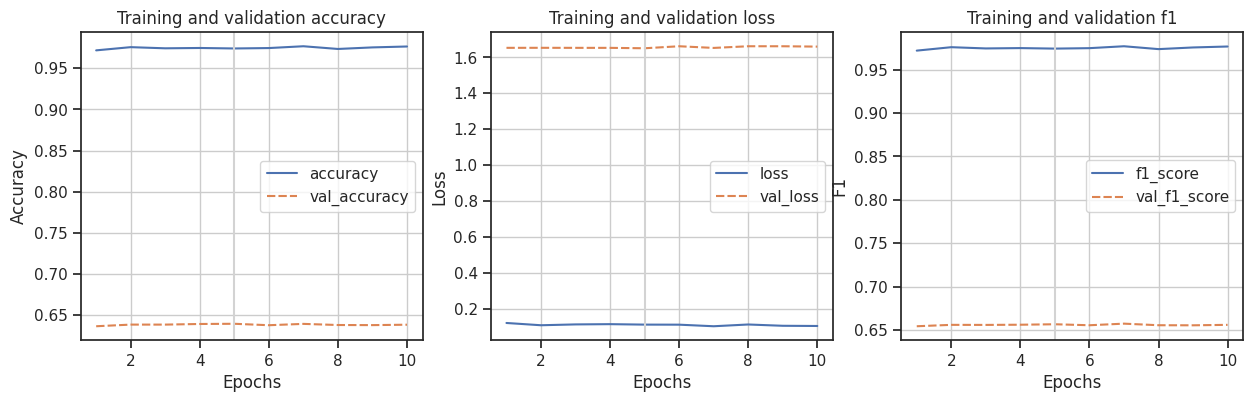

In [ ]:
plot_model_performance(history_finetuning8, axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + '/ResNetft_3blocks.h5'))

166/166 [==============================] - 17s 92ms/step - loss: 1.7156 - accuracy: 0.6370 - f1_score: 0.6566

Test loss: 1.716
Test accuracy: 0.637
Test f1: 0.657

Accuracy on test data: 63.70 %
F1-Score on test data: 65.66 %

              precision    recall  f1-score   support

     abhori1       0.68      0.64      0.66        50
     afecuc1       1.00      0.86      0.92        28
     afghor1       0.62      0.80      0.70        20
     afmdov1       0.46      0.73      0.56        15
     afpfly1       0.19      0.29      0.23        31
     afpwag1       0.44      0.67      0.53        24
     afrgos1       0.45      0.62      0.53        24
     afrthr1       0.67      0.73      0.70        30
     amesun2       0.08      0.23      0.12        13
      barswa       0.65      0.49      0.56       166
     bawhor2       0.42      0.67      0.51        15
     bcbeat1       0.30      1.00      0.46        17
     beasun2       0.25      0.67      0.36        12
     bkctch1   